<a href="https://colab.research.google.com/github/Gabriele90/ML-for-the-life-sciences-/blob/main/Covid19_detection_using_X_ray_images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***CNN COVID-19 DETECTION***

In this study, I aimed to present the use of deep learning for the high-accuracy detection of COVID-19 using chest X-ray images. Publicly available X-ray images (1583 healthy, 4292 pneumonia, and 225 confirmed COVID-19) were used in the experiments, which involved the training of deep learning and machine learning classifiers. The experiment was performed using five machine learning models: 3 CNN with different depth and layers followed by Alexnet model and VGG16 model. Accuracy and loss values were compared. The most efficient model was, finally, tested for predicting on new data.


***Import Libraries***

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as numpy
import matplotlib.pyplot as pyplot

***Clone & Explore dataset***

In [ ]:
#clone the dataset from the github repository
! git clone https://github.com/education454/datasets.git

Cloning into 'datasets'...
remote: Enumerating objects: 2301, done.
remote: Total 2301 (delta 0), reused 0 (delta 0), pack-reused 2301
Receiving objects: 100% (2301/2301), 1.31 GiB | 28.98 MiB/s, done.
Checking out files: 100% (2295/2295), done.


In [ ]:
#set the path to the main dir
import os
main_dir = "/content/datasets/Data"
#set the path to the train dir
train_dir = os.path.join(main_dir,'train')
#set the path to the test dir
test_dir = os.path.join(main_dir,'test')
#directory with the training covid images
train_covid_dir = os.path.join(train_dir, 'COVID19')
#directory with the training normal images
train_normal_dir = os.path.join(train_dir, 'NORMAL')
#directory with the testing covid images
test_covid_dir = os.path.join(test_dir, 'COVID19')
#directory with the testing normal images
test_normal_dir = os.path.join(test_dir, 'NORMAL')

In [ ]:
#print the filenames
train_covid_names = os.listdir(train_covid_dir)
print(train_covid_names[:10])

train_normal_names = os.listdir(train_normal_dir)
print(train_normal_names[:10])

test_covid_names = os.listdir(test_covid_dir)
print(test_covid_names[:10])

test_normal_names = os.listdir(test_normal_dir)
print(test_normal_names[:10])

['COVID19(492).jpg', 'COVID19(365).jpg', 'COVID19(390).jpg', 'COVID19(236).jpg', 'COVID19(447).jpg', 'COVID19(74).jpg', 'COVID19(574).jpg', 'COVID19(113).jpg', 'COVID-19 (269).jpg', 'COVID19(503).jpg']
['NORMAL(226).jpg', 'NORMAL(964).jpg', 'NORMAL(419).jpg', 'NORMAL(670).jpg', 'NORMAL(1573).jpg', 'NORMAL(507).jpg', 'NORMAL(1360).jpg', 'NORMAL(1164).jpg', 'NORMAL(916).jpg', 'NORMAL(342).jpg']
['COVID-19 (809).jpg', 'COVID19(391).jpg', 'COVID19(549).jpg', 'COVID-19 (878).jpg', 'COVID-19 (826).jpg', 'COVID19(463).jpg', 'COVID19(160).jpg', 'COVID-19 (522).jpg', 'COVID19(98).jpg', 'COVID19(541).jpg']
['NORMAL(1044).jpg', 'NORMAL(61).jpg', 'NORMAL(154).jpg', 'NORMAL(477).jpg', 'NORMAL(911).jpg', 'NORMAL(290).jpg', 'NORMAL(310).jpg', 'NORMAL(1396).jpg', 'NORMAL(1566).jpg', 'NORMAL(1004).jpg']


In [ ]:
#print the total no of images present in each dir
print("Total images in the training set:", len(train_covid_names+train_normal_names))
print("Total images in the test set:", len(test_covid_names+test_normal_names))

Total images in the training set: 1811
Total images in the test set: 484


***Data Visualization***

In [ ]:
#get the filenames from the covid & normal dir of the train dataset
covid_pic =[os.path.join(train_covid_dir, filename) for filename in train_covid_names[0:8]]
normal_pic =[os.path.join(train_normal_dir, filename) for filename in train_normal_names[0:8]]
#print the list
print(covid_pic)
print(normal_pic)

['/content/datasets/Data/train/COVID19/COVID19(492).jpg', '/content/datasets/Data/train/COVID19/COVID19(365).jpg', '/content/datasets/Data/train/COVID19/COVID19(390).jpg', '/content/datasets/Data/train/COVID19/COVID19(236).jpg', '/content/datasets/Data/train/COVID19/COVID19(447).jpg', '/content/datasets/Data/train/COVID19/COVID19(74).jpg', '/content/datasets/Data/train/COVID19/COVID19(574).jpg', '/content/datasets/Data/train/COVID19/COVID19(113).jpg']
['/content/datasets/Data/train/NORMAL/NORMAL(226).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(964).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(419).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(670).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(1573).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(507).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(1360).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(1164).jpg']


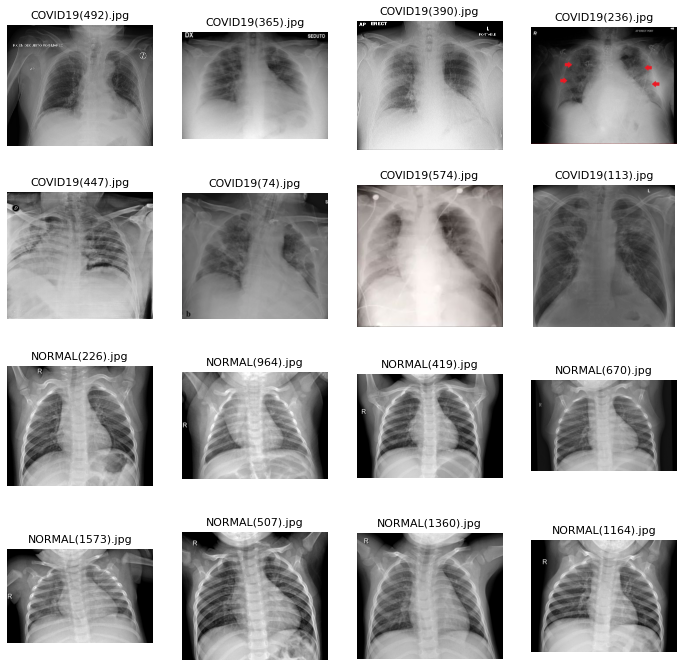

In [ ]:
import matplotlib.pyplot as plt
# plot a grid of 16 images (8 images of Covid19 and 8 images of Normal)
import matplotlib.image as mpimg
#set the number of columns and rows
rows = 4
cols = 4
#set the figure size
fig = plt.gcf()
fig.set_size_inches(12,12)
#merge the covid and normal list
merged_list = covid_pic+normal_pic
for i , img_path in enumerate(merged_list):
  data= img_path.split('/', 6)[6]
  sp = plt.subplot(rows, cols, i + 1 )
  sp.axis('Off')
  img = mpimg.imread(img_path)
  sp.set_title(data, fontsize=11)
  plt.imshow(img,cmap='gray')

  plt.show

***Data Preprocessing & Augmentation***

Data augmentation is a strategy that enables practitioners to significantly increase the diversity of data available for training models, without actually collecting new data. Data augmentation techniques such as cropping, padding, and horizontal flipping are commonly used to train large neural networks.

In [ ]:
# generate training,testing and validation batches 
dgen_train = ImageDataGenerator(rescale =1./255,
                                validation_split=0.2,
                                zoom_range = 0.2,
                                horizontal_flip =True)
dgen_validation = ImageDataGenerator(rescale = 1./255)
dgen_test = ImageDataGenerator(rescale =1./255)

train_generator = dgen_train.flow_from_directory(train_dir,
                                                 target_size=(150,150),
                                                 subset='training',
                                                 batch_size = 32,
                                                 class_mode = 'binary')

validation_generator = dgen_train.flow_from_directory(train_dir,
                                                 target_size=(150,150),
                                                 subset='validation',
                                                 batch_size = 32,
                                                 class_mode = 'binary')

test_generator = dgen_test.flow_from_directory(test_dir,
                                                 target_size=(150,150),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 1449 images belonging to 2 classes.
Found 362 images belonging to 2 classes.
Found 484 images belonging to 2 classes.


In [ ]:
#get the class indices
train_generator.class_indices

{'COVID19': 0, 'NORMAL': 1}

In [ ]:
#get the image shape
train_generator.image_shape

(150, 150, 3)

***Build Convolutional Neural Network Model***

We use three different network architectures
with varying numbers of convolutional and fully connected
layers, and basic image pre-processing techniques to test
the results using various structures and pre-processing
methods.

***ConvNet1***

The first structure (ConvNet1) consisted of two convolutional
layers with 64 and 16 filters, respectively, with three
fully connected (dense) layers with 128, 8 and 1 neurons. One flatten layer in the middle.

In [ ]:
model_1 = Sequential()
# add the convolutional layer
# filters, size of filters,padding,activation_function,input_shape
model_1.add(Conv2D(64,(3,3), padding='SAME', activation='relu', input_shape=(150,150,3)))
# pooling layer
model_1.add(MaxPooling2D(pool_size=(2,2)))
# place a dropout layer
model_1.add(Dropout(0.2))
# add the second convolutional layer
model_1.add(Conv2D(16,(3,3), padding='SAME', activation='relu'))
# pooling layer
model_1.add(MaxPooling2D(pool_size=(1,1)))
# place a dropout layer
model_1.add(Dropout(0.2))
# Flatten layer
model_1.add(Flatten())
# add two dense layers : amount of nodes, activation
model_1.add(Dense(128, activation='relu'))
model_1.add(Dense(8, activation='relu'))
# place a dropout layer
# 0.5 drop out rate is recommended, half input nodes will be dropped at each update
model_1.add(Dropout(0.5))
model_1.add(Dense(1,activation='sigmoid'))

model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 75, 75, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 16)        9232      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 75, 75, 16)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 75, 75, 16)        0         
_________________________________________________________________
flatten (Flatten)            (None, 90000)             0

***ConvNet2***

ConvNet2, was the second architecture in this study and consisted of two convolutional layers (32 and 64 filters), 1 flatten layer and two fully connected layers (256 and 1 neurons). It was the lightest architecture considered in this study.

In [ ]:
model_2 = Sequential()
# add the convolutional layer
# filters, size of filters,padding,activation_function,input_shape
model_2.add(Conv2D(32,(5,5), padding='SAME', activation='relu', input_shape=(150,150,3)))
# pooling layer
model_2.add(MaxPooling2D(pool_size=(2,2)))
# place a dropout layer
model_2.add(Dropout(0.5))
# add another convolutional layer
model_2.add(Conv2D(64,(5,5), padding='SAME', activation='relu'))
# pooling layer
model_2.add(MaxPooling2D(pool_size=(2,2)))
# place a dropout layer
model_2.add(Dropout(0.5))
# Flatten layer
model_2.add(Flatten())
# add a dense layer : amount of nodes, activation
model_2.add(Dense(256, activation='relu'))
# place a dropout layer
# 0.5 drop out rate is recommended, half input nodes will be dropped at each update
model_2.add(Dropout(0.5))
model_2.add(Dense(1,activation='sigmoid'))
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 150, 150, 32)      2432      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 75, 75, 32)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 75, 75, 64)        51264     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 37, 37, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 87616)            

***ConvNet3***

ConvNet3, was the deepest architecture in this
study and consisted of four convolutional layers (256, 128, 128,
and 64 filters), one flatten layer and four fully connected layers (128, 64, 8 and 1 neurons).

In [ ]:
model_3 = Sequential()
# add the convolutional layer
# filters, size of filters,padding,activation_function,input_shape
model_3.add(Conv2D(256,(3,3), padding='SAME', activation='relu', input_shape=(150,150,3)))
# pooling layer
model_3.add(MaxPooling2D(pool_size=(2,2)))
# place a dropout layer
model_3.add(Dropout(0.2))
# add the second convolutional layer
model_3.add(Conv2D(128,(3,3), padding='SAME', activation='relu'))
# pooling layer
model_3.add(MaxPooling2D(pool_size=(2,2)))
# place a dropout layer
model_3.add(Dropout(0.2))
# add the third convolutional layer
model_3.add(Conv2D(128,(2,2), padding='SAME', activation='relu'))
# pooling layer
model_3.add(MaxPooling2D(pool_size=(1,1)))
# place a dropout layer
model_3.add(Dropout(0.2))
# add the fourth convolutional layer
model_3.add(Conv2D(64,(1,1), padding='SAME', activation='relu'))
# pooling layer
model_3.add(MaxPooling2D(pool_size=(1,1)))
# place a dropout layer
model_3.add(Dropout(0.2))
# Flatten layer
model_3.add(Flatten())
# add three dense layers : amount of nodes, activation
model_3.add(Dense(128, activation='relu'))
model_3.add(Dense(64, activation='relu'))
model_3.add(Dense(8,activation='relu'))
# place a dropout layer
# 0.5 drop out rate is recommended, half input nodes will be dropped at each update
model_3.add(Dropout(0.5))
model_3.add(Dense(1,activation='sigmoid'))
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 150, 150, 256)     7168      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 75, 75, 256)       0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 75, 75, 256)       0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 75, 75, 128)       295040    
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 37, 37, 128)       0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 37, 37, 128)       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 37, 37, 128)      

***Compile & Train the 3 CNN Models***

In [ ]:
#compile the CNN1 model
model_1.compile(Adam(lr=0.001),loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
#train the CNN1 model
history_1 = model_1.fit(train_generator,
                  epochs=30,
                  validation_data=validation_generator)

Epoch 1/30
46/46 [==============================] - 59s 1s/step - loss: 0.7243 - accuracy: 0.6564 - val_loss: 0.4515 - val_accuracy: 0.6989
Epoch 2/30
46/46 [==============================] - 52s 1s/step - loss: 0.5376 - accuracy: 0.6719 - val_loss: 0.3119 - val_accuracy: 0.6989
Epoch 3/30
46/46 [==============================] - 52s 1s/step - loss: 0.4827 - accuracy: 0.7184 - val_loss: 0.2722 - val_accuracy: 0.7099
Epoch 4/30
46/46 [==============================] - 53s 1s/step - loss: 0.5017 - accuracy: 0.7737 - val_loss: 0.1868 - val_accuracy: 0.9475
Epoch 5/30
46/46 [==============================] - 53s 1s/step - loss: 0.4694 - accuracy: 0.7834 - val_loss: 0.1400 - val_accuracy: 0.9475
Epoch 6/30
46/46 [==============================] - 53s 1s/step - loss: 0.4524 - accuracy: 0.8079 - val_loss: 0.4039 - val_accuracy: 0.8315
Epoch 7/30
46/46 [==============================] - 54s 1s/step - loss: 0.3889 - accuracy: 0.8079 - val_loss: 0.1627 - val_accuracy: 0.9503
Epoch 8/30
46/46 [==

In [ ]:
#compile the CNN2 model
model_2.compile(Adam(lr=0.001),loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
#train the CNN2 model
history_2=model_2.fit(train_generator,
                  epochs=30,
                  validation_data=validation_generator)

Epoch 1/30
46/46 [==============================] - 54s 1s/step - loss: 1.2120 - accuracy: 0.6974 - val_loss: 0.3022 - val_accuracy: 0.8785
Epoch 2/30
46/46 [==============================] - 53s 1s/step - loss: 0.2108 - accuracy: 0.9156 - val_loss: 0.1876 - val_accuracy: 0.9254
Epoch 3/30
46/46 [==============================] - 53s 1s/step - loss: 0.1418 - accuracy: 0.9461 - val_loss: 0.1192 - val_accuracy: 0.9558
Epoch 4/30
46/46 [==============================] - 54s 1s/step - loss: 0.1550 - accuracy: 0.9448 - val_loss: 0.1341 - val_accuracy: 0.9475
Epoch 5/30
46/46 [==============================] - 54s 1s/step - loss: 0.1344 - accuracy: 0.9477 - val_loss: 0.1460 - val_accuracy: 0.9586
Epoch 6/30
46/46 [==============================] - 54s 1s/step - loss: 0.1340 - accuracy: 0.9593 - val_loss: 0.1179 - val_accuracy: 0.9586
Epoch 7/30
46/46 [==============================] - 54s 1s/step - loss: 0.1217 - accuracy: 0.9521 - val_loss: 0.1207 - val_accuracy: 0.9669
Epoch 8/30
46/46 [==

In [ ]:
#compile the CNN3 model
model_3.compile(Adam(lr=0.001),loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
#train the CNN3 model
history_3 = model_3.fit(train_generator,
                  epochs=30,
                  validation_data=validation_generator)

Epoch 1/30
46/46 [==============================] - 62s 1s/step - loss: 0.6379 - accuracy: 0.6256 - val_loss: 0.2697 - val_accuracy: 0.9365
Epoch 2/30
46/46 [==============================] - 58s 1s/step - loss: 0.3947 - accuracy: 0.7818 - val_loss: 0.2248 - val_accuracy: 0.9337
Epoch 3/30
46/46 [==============================] - 57s 1s/step - loss: 0.3658 - accuracy: 0.8143 - val_loss: 0.2233 - val_accuracy: 0.9530
Epoch 4/30
46/46 [==============================] - 57s 1s/step - loss: 0.3311 - accuracy: 0.8125 - val_loss: 0.1766 - val_accuracy: 0.9530
Epoch 5/30
46/46 [==============================] - 57s 1s/step - loss: 0.3136 - accuracy: 0.8249 - val_loss: 0.1682 - val_accuracy: 0.9448
Epoch 6/30
46/46 [==============================] - 57s 1s/step - loss: 0.3180 - accuracy: 0.8445 - val_loss: 0.1447 - val_accuracy: 0.9503
Epoch 7/30
46/46 [==============================] - 57s 1s/step - loss: 0.3274 - accuracy: 0.8382 - val_loss: 0.1687 - val_accuracy: 0.9586
Epoch 8/30
46/46 [==

***Model Performance Evaluation***

In [ ]:
#get the keys of history object
history_1.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

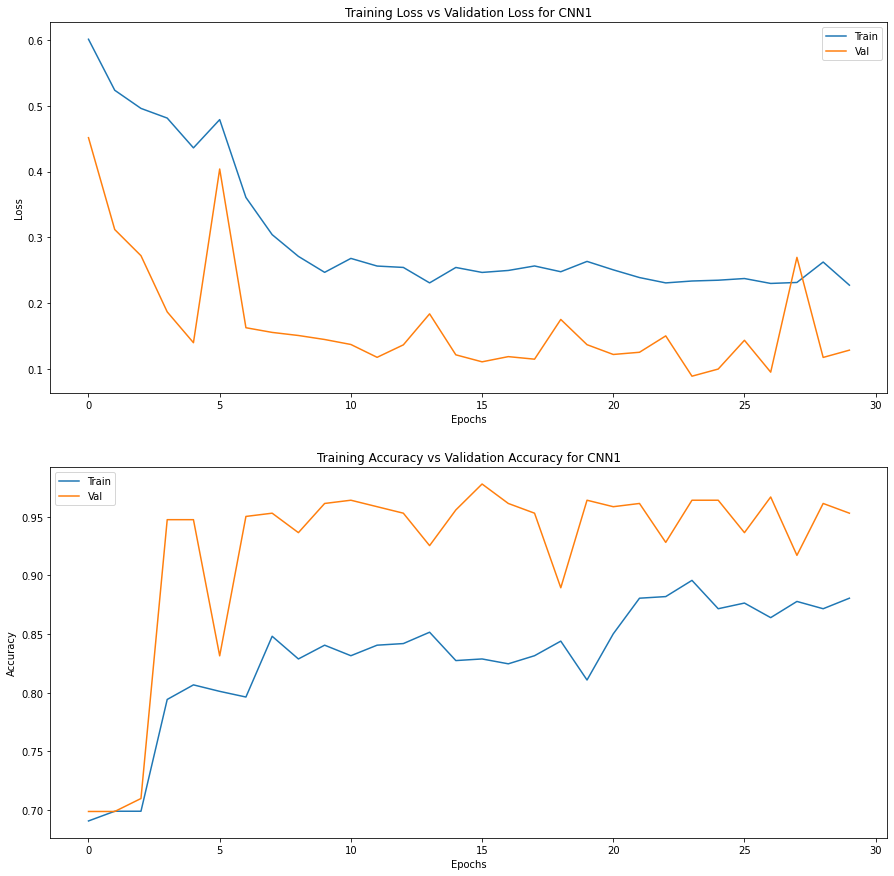

In [ ]:
fig, axs = plt.subplots(2, 1, figsize=(10,10))
axs[0].plot(history_1.history['loss'])
axs[0].plot(history_1.history['val_loss'])
axs[0].title.set_text('Training Loss vs Validation Loss for CNN1')
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Loss')
axs[0].legend(['Train', 'Val'])
axs[1].plot(history_1.history['accuracy'])
axs[1].plot(history_1.history['val_accuracy'])
axs[1].title.set_text('Training Accuracy vs Validation Accuracy for CNN1')
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Accuracy')
axs[1].legend(['Train', 'Val'])

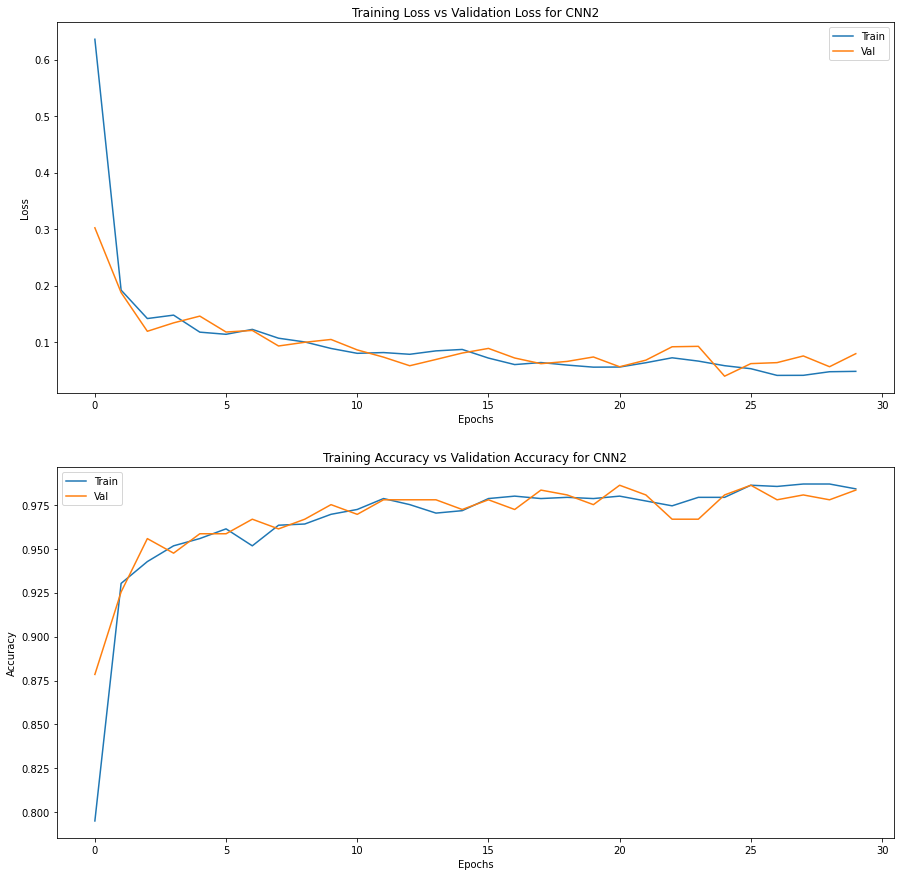

In [ ]:
fig, axs = plt.subplots(2, 1, figsize=(10,10))
axs[0].plot(history_2.history['loss'])
axs[0].plot(history_2.history['val_loss'])
axs[0].title.set_text('Training Loss vs Validation Loss for CNN2')
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Loss')
axs[0].legend(['Train', 'Val'])
axs[1].plot(history_2.history['accuracy'])
axs[1].plot(history_2.history['val_accuracy'])
axs[1].title.set_text('Training Accuracy vs Validation Accuracy for CNN2')
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Accuracy')
axs[1].legend(['Train', 'Val'])

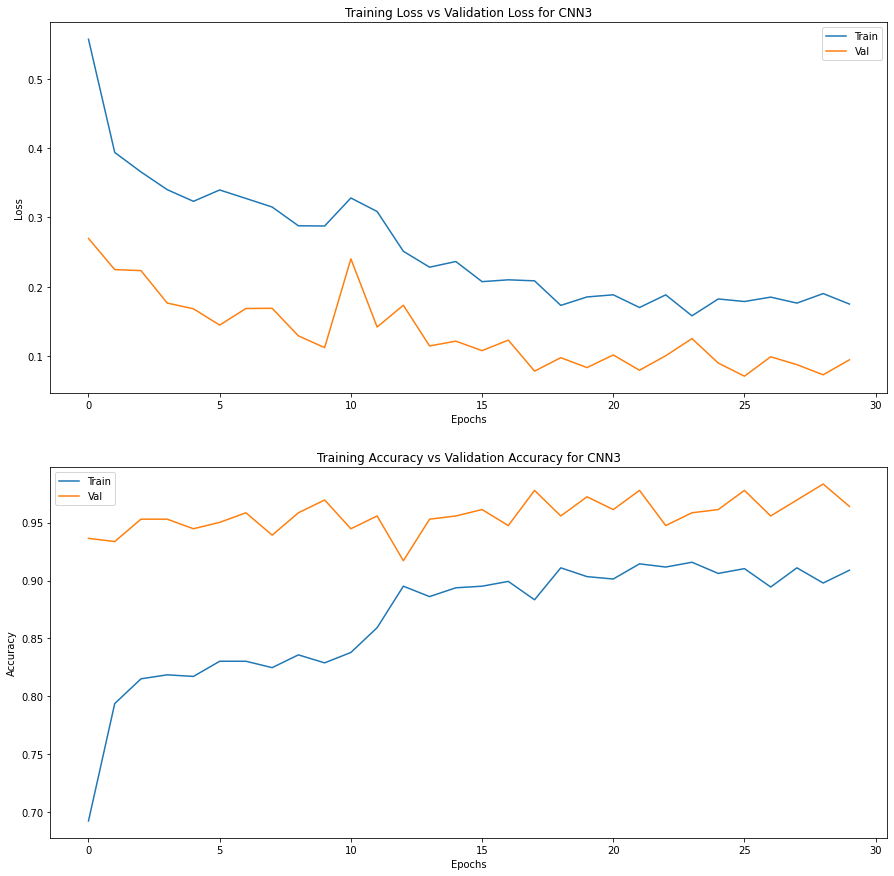

In [ ]:
fig, axs = plt.subplots(2, 1, figsize=(10,10))
axs[0].plot(history_3.history['loss'])
axs[0].plot(history_3.history['val_loss'])
axs[0].title.set_text('Training Loss vs Validation Loss for CNN3')
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Loss')
axs[0].legend(['Train', 'Val'])
axs[1].plot(history_3.history['accuracy'])
axs[1].plot(history_3.history['val_accuracy'])
axs[1].title.set_text('Training Accuracy vs Validation Accuracy for CNN3')
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Accuracy')
axs[1].legend(['Train', 'Val'])

***Accuracy and loss comparison***

In [ ]:
# get the test accuracy and loss for the 3 models
test_loss_1,test_acc_1 = model_1.evaluate(test_generator)
test_loss_2,test_acc_2 = model_2.evaluate(test_generator)
test_loss_3,test_acc_3 = model_3.evaluate(test_generator)
print('CNN1 model test loss :{} test acc:{}'.format(test_loss_1,test_acc_1))
print('CNN2 model test loss :{} test acc:{}'.format(test_loss_2,test_acc_2))
print('CNN3 model test loss :{} test acc:{}'.format(test_loss_3,test_acc_3))

16/16 [==============================] - 12s 753ms/step - loss: 0.0791 - accuracy: 0.9731
CNN1 model test loss :0.11471261084079742 test acc:0.9586777091026306
CNN2 model test loss :0.05479729175567627 test acc:0.9855371713638306
CNN3 model test loss :0.07905574142932892 test acc:0.9731404781341553


As we can see, the three model present exellent accuracies. In particular the CNN2 model has the best accuracy value.

***ROC AUC scores***

Now, let's calculate our ROC curve and plot it.
First, let's make predictions on our test set. When using generators to make predictions, we must first turn off shuffle (as we did when we created test_generator) and reset the generator:

In [ ]:
STEP_SIZE_TEST_=test_generator.n//test_generator.batch_size
test_generator.reset()
preds_1 = model_1.predict(test_generator,
                      verbose=1)
preds_2 = model_2.predict(test_generator,
                      verbose=1)
preds_3 = model_3.predict(test_generator,
                      verbose=1)

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

In [ ]:
fpr_fc_1, tpr_fc_1, _ = roc_curve(test_generator.classes, preds_1)
fpr_fc_2, tpr_fc_2, _ = roc_curve(test_generator.classes, preds_2)
fpr_fc_3, tpr_fc_3, _ = roc_curve(test_generator.classes, preds_3)

In [ ]:
roc_auc_1 = auc(fpr_fc_1, tpr_fc_1)

In [ ]:
roc_auc_2 = auc(fpr_fc_2, tpr_fc_2)

In [ ]:
roc_auc_3 = auc(fpr_fc_3, tpr_fc_3)

In [ ]:
plt_fc_1 = plt.figure()
lw = 2
plt.plot(fpr_fc_1, tpr_fc_1, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc_1)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic CNN1')
plt.legend(loc="lower right")
plt.show()

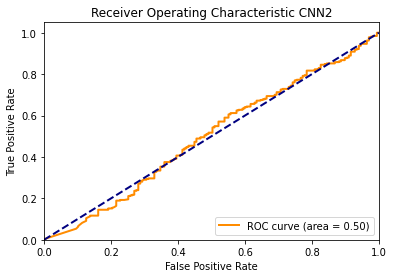

In [ ]:
plt_fc_1 = plt.figure()
lw = 2
plt.plot(fpr_fc_2, tpr_fc_2, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc_2)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic CNN2')
plt.legend(loc="lower right")
plt.show()

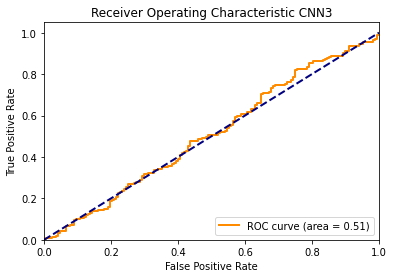

In [ ]:
plt_fc_1 = plt.figure()
lw = 2
plt.plot(fpr_fc_3, tpr_fc_3, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc_3)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic CNN3')
plt.legend(loc="lower right")
plt.show()

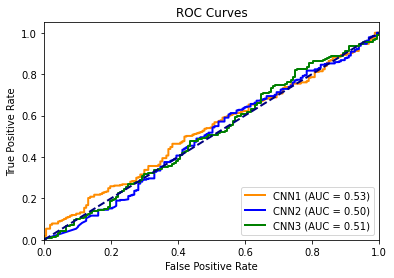

In [ ]:
plt.figure(4)
lw = 2
plt.plot(fpr_fc_1, tpr_fc_1, color='darkorange',
         lw=lw, label='CNN1 (AUC = %0.2f)' % roc_auc_1)
plt.plot(fpr_fc_2, tpr_fc_2, color='blue',
         lw=lw, label='CNN2 (AUC = %0.2f)' % roc_auc_2)
plt.plot(fpr_fc_3, tpr_fc_3, color='green',
         lw=lw, label='CNN3 (AUC = %0.2f)' % roc_auc_3)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend(loc="lower right")
plt.show()

The 3 CNN models present ROC curves with a similar AUC values.

***Alexnet model***

AlexNet is one of the first examples of deep convolutional neural networks and it swept the competitions thanks to its high complexity (at the time) and the training procedure that is performed on GPUs.
The first five layers are similar to LeNet layers in a sense. The layers consist of 96 filters with the sizes of 11 x 11, 256 layers with the sizes of 5 x 5, 384 layers with the sizes of 3 x 3, 384 layers with the sizes of 3 x 3, and finally 256 filters with the sizes of 3 x 3, respectively. Unlike LeNet, AlexNet uses ReLU activation function. ReLU does not involve exponentiation operation, which is computationally expensive, thus ReLU is very cheap to calculate. 

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models, losses
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten,\
 Conv2D, MaxPooling2D,BatchNormalization,LayerNormalization

In [ ]:
model_4 = Sequential()
# 1st Convolutional Layer
model_4.add(Conv2D(filters=96, input_shape=(150,150,3), kernel_size=(11,11),\
 strides=(4,4), padding='valid'))
model_4.add(Activation('relu'))
# Pooling 
model_4.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
# Batch Normalisation before passing it to the next layer
model_4.add(BatchNormalization())
# 2nd Convolutional Layer
model_4.add(Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), padding='same'))
model_4.add(Activation('relu'))
# Pooling
model_4.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='valid'))
# Batch Normalisation
model_4.add(BatchNormalization())
# 3rd Convolutional Layer
model_4.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
model_4.add(Activation('relu'))
# Batch Normalisation
model_4.add(BatchNormalization())
# 4th Convolutional Layer
model_4.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
model_4.add(Activation('relu'))
# Batch Normalisation
model_4.add(BatchNormalization())
# 5th Convolutional Layer
model_4.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same'))
model_4.add(Activation('relu'))
# Pooling
model_4.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='valid'))
# Batch Normalisation
model_4.add(BatchNormalization())
# Passing it to a dense layer
model_4.add(Flatten())
# 1st Dense Layer
model_4.add(Dense(4096, input_shape=(224*224*3,)))
model_4.add(Activation('relu'))
# Add Dropout to prevent overfitting
model_4.add(Dropout(0.4))
# Batch Normalisation
model_4.add(BatchNormalization())
# 2nd Dense Layer
model_4.add(Dense(4096))
model_4.add(Activation('relu'))
# Add Dropout
model_4.add(Dropout(0.4))
# Batch Normalisation
model_4.add(BatchNormalization())
#  output Layer 
model_4.add(Dense(1000))
model_4.add(Activation('softmax'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resizing (Resizing)          (None, 224, 224, 3)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 56, 56, 96)        34944     
_________________________________________________________________
lambda (Lambda)              (None, 56, 56, 96)        0         
_________________________________________________________________
activation (Activation)      (None, 56, 56, 96)        0         
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 27, 27, 96)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 7, 7, 256)         614656    
_________________________________________________________________
lambda_1 (Lambda)            (None, 7, 7, 256)        

In [ ]:
#compile the Alexnet model
model_4.compile(Adam(lr=0.001),loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
#train the Alexnet model
history_4 = model_4.fit(train_generator,
                  epochs=30,
                  validation_data=validation_generator)

Epoch 1/30
46/46 [==============================] - 58s 1s/step - loss: 0.6459 - accuracy: 0.6793 - val_loss: 0.5920 - val_accuracy: 0.6989
Epoch 2/30
46/46 [==============================] - 56s 1s/step - loss: 0.5697 - accuracy: 0.7463 - val_loss: 0.4897 - val_accuracy: 0.8757
Epoch 3/30
46/46 [==============================] - 56s 1s/step - loss: 0.5123 - accuracy: 0.8168 - val_loss: 0.4638 - val_accuracy: 0.8840
Epoch 4/30
46/46 [==============================] - 56s 1s/step - loss: 0.4889 - accuracy: 0.8408 - val_loss: 0.5545 - val_accuracy: 0.7348
Epoch 5/30
46/46 [==============================] - 56s 1s/step - loss: 0.4879 - accuracy: 0.8239 - val_loss: 0.4145 - val_accuracy: 0.9171
Epoch 6/30
46/46 [==============================] - 56s 1s/step - loss: 0.4714 - accuracy: 0.8202 - val_loss: 0.4137 - val_accuracy: 0.9254
Epoch 7/30
46/46 [==============================] - 56s 1s/step - loss: 0.4286 - accuracy: 0.8479 - val_loss: 0.4034 - val_accuracy: 0.9309
Epoch 8/30
46/46 [==

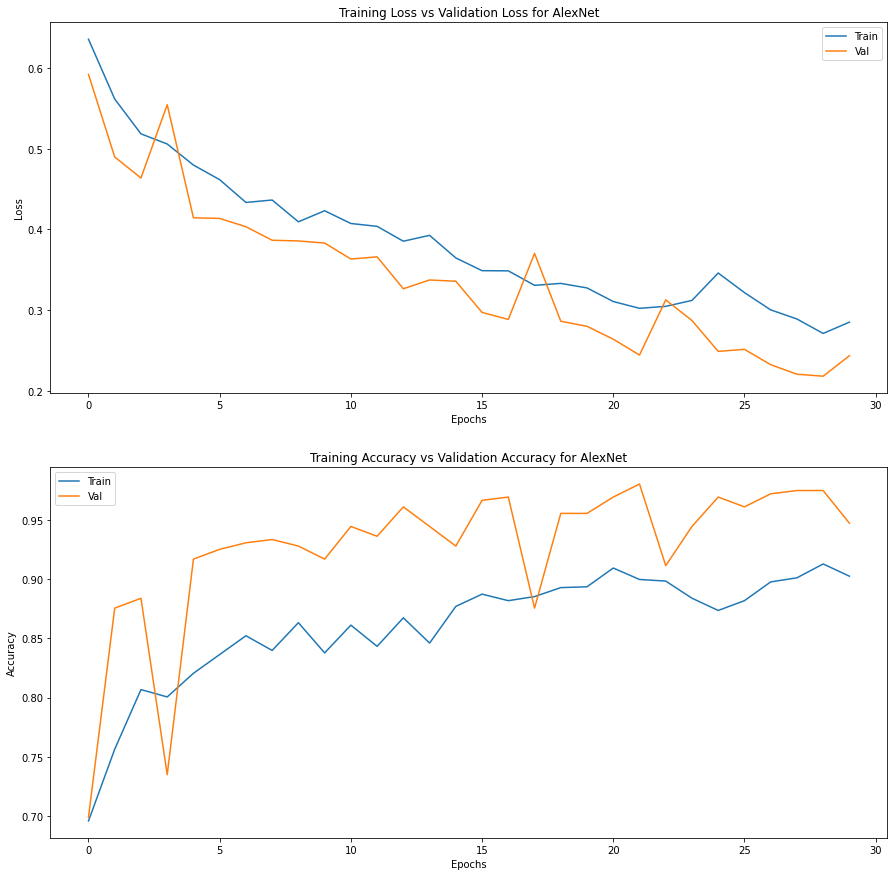

In [ ]:
fig, axs = plt.subplots(2, 1, figsize=(15,15))
axs[0].plot(history_4.history['loss'])
axs[0].plot(history_4.history['val_loss'])
axs[0].title.set_text('Training Loss vs Validation Loss for AlexNet')
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Loss')
axs[0].legend(['Train', 'Val'])
axs[1].plot(history_4.history['accuracy'])
axs[1].plot(history_4.history['val_accuracy'])
axs[1].title.set_text('Training Accuracy vs Validation Accuracy for AlexNet')
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Accuracy')
axs[1].legend(['Train', 'Val'])

***Accuracy and loss values***

In [ ]:
# get the test accuracy and loss for the 4th models
test_loss_4,test_acc_4 = model_4.evaluate(test_generator)
print('AlexNet model test loss :{} test acc:{}'.format(test_loss_4,test_acc_4))

16/16 [==============================] - 11s 699ms/step - loss: 0.3053 - accuracy: 0.9174
AlexNet model test loss :0.3053368926048279 test acc:0.9173553586006165


As we can see, Alexnet present a good accuracy, but still lower compared to the three CNN models.

***VGG16 model***

The main contribution of VGG16 compared to AlexNet is using smaller filters on top of each other instead of one single large filter.
VGG16 consists of many convolutional, subsampling, and fully connected layers. The architecture continues with convolutional layers having the following specifications:

Two layers with feature map size = 64, kernel size = 3

Two layers with feature map size = 128, kernel size = 3

Two layers with feature map size = 256, kernel size = 3

One layer with feature map size = 256, kernel size = 1

Two layers with feature map size = 512, kernel size = 3

One layers with feature map size = 512, kernel size = 1

Two layers with feature map size = 512, kernel size = 3

One layers with feature map size = 512, kernel size = 1

Each convolutional layer has stride = 1 and pooling option = “same”. Setting the pooling argument “same” means that the input tensor is padded such that after the convolution the resulting tensor shape equals to input tensor shape for stride = 1. For example _,64,64,_ tensor would come out as _,64,64,_ from the layer if stride = 1 and pooling = “same”. The same tensor would come out as _,32,32,_ for stride = 2 and pooling = “same”. After blocks 1, 2, 4, 6, and 8 max-pooling layers are placed stride = 2 and kernel size = 2.
Convolutional layers are followed by three fully connected layers having the sizes of 4096, 4096, and 10, with a 0.5 dropout rate. 

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models, losses
import keras,os
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten
from keras.preprocessing.image import ImageDataGenerator
import numpy as np

In [ ]:
model_5 = Sequential()
model_5.add(Conv2D(input_shape=(150,150,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model_5.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model_5.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model_5.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model_5.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model_5.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model_5.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model_5.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model_5.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model_5.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model_5.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model_5.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model_5.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model_5.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model_5.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model_5.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model_5.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model_5.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model_5.add(Flatten())
model_5.add(Dense(units=4096,activation="relu"))
model_5.add(Dense(units=4096,activation="relu"))
model_5.add(Dense(units=1, activation="softmax"))
model_5.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_93 (Conv2D)           (None, 150, 150, 64)      1792      
_________________________________________________________________
conv2d_94 (Conv2D)           (None, 150, 150, 64)      36928     
_________________________________________________________________
max_pooling2d_40 (MaxPooling (None, 75, 75, 64)        0         
_________________________________________________________________
conv2d_95 (Conv2D)           (None, 75, 75, 128)       73856     
_________________________________________________________________
conv2d_96 (Conv2D)           (None, 75, 75, 128)       147584    
_________________________________________________________________
max_pooling2d_41 (MaxPooling (None, 37, 37, 128)       0         
_________________________________________________________________
conv2d_97 (Conv2D)           (None, 37, 37, 256)     

In [ ]:
#compile the CNN5 model
model_5.compile(Adam(lr=0.001),loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
#train the CNN5 model
history_5 = model_5.fit(train_generator,
                  epochs=30,
                  validation_data=validation_generator)

Epoch 1/30
46/46 [==============================] - 69s 1s/step - loss: 39.5555 - accuracy: 0.7049 - val_loss: 0.6124 - val_accuracy: 0.6989
Epoch 2/30
46/46 [==============================] - 63s 1s/step - loss: 0.6205 - accuracy: 0.6961 - val_loss: 0.6133 - val_accuracy: 0.6989
Epoch 3/30
46/46 [==============================] - 63s 1s/step - loss: 0.6217 - accuracy: 0.6921 - val_loss: 0.6122 - val_accuracy: 0.6989
Epoch 4/30
46/46 [==============================] - 63s 1s/step - loss: 0.6040 - accuracy: 0.7118 - val_loss: 0.6154 - val_accuracy: 0.6989
Epoch 5/30
46/46 [==============================] - 63s 1s/step - loss: 0.6147 - accuracy: 0.6986 - val_loss: 0.6119 - val_accuracy: 0.6989
Epoch 6/30
46/46 [==============================] - 63s 1s/step - loss: 0.6076 - accuracy: 0.7048 - val_loss: 0.6132 - val_accuracy: 0.6989
Epoch 7/30
46/46 [==============================] - 63s 1s/step - loss: 0.6207 - accuracy: 0.6884 - val_loss: 0.6118 - val_accuracy: 0.6989
Epoch 8/30
46/46 [=

Notice that VGG16 has more than 129 million trainable parameters, which means that is more than 6 times the size of AlexNet

In [ ]:
history_5.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

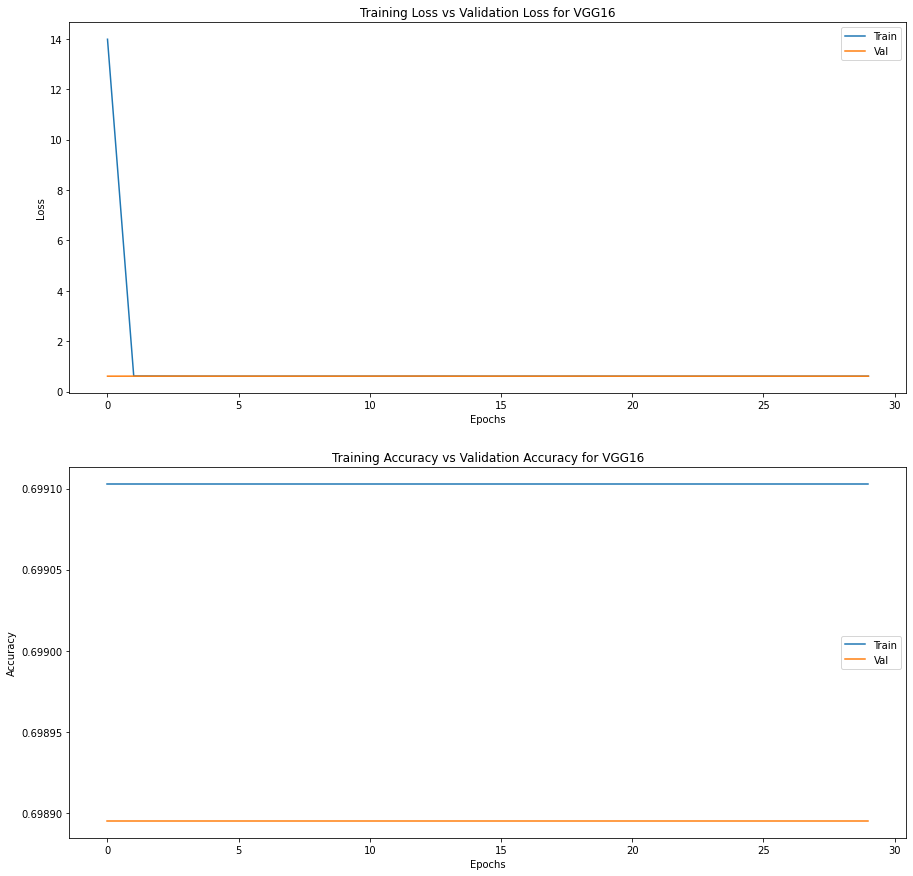

In [ ]:
fig, axs = plt.subplots(2, 1, figsize=(15,15))
axs[0].plot(history_5.history['loss'])
axs[0].plot(history_5.history['val_loss'])
axs[0].title.set_text('Training Loss vs Validation Loss for VGG16')
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Loss')
axs[0].legend(['Train', 'Val'])
axs[1].plot(history_5.history['accuracy'])
axs[1].plot(history_5.history['val_accuracy'])
axs[1].title.set_text('Training Accuracy vs Validation Accuracy for VGG16')
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Accuracy')
axs[1].legend(['Train', 'Val'])

***Accuracy and loss values***

In [ ]:
# get the test accuracy and loss for the 5th models
test_loss_5,test_acc_5 = model_5.evaluate(test_generator)
print('VGG16 model test loss :{} test acc:{}'.format(test_loss_5,test_acc_5))

16/16 [==============================] - 13s 847ms/step - loss: 0.6481 - accuracy: 0.6550
VGG16 model test loss :0.6481381058692932 test acc:0.6549586653709412


As we can see VGG16 model present the lowest accuracy value.

Now let's compare the ROC AUC scores for the Alexnet and VGG16 models.

In [ ]:
STEP_SIZE_TEST_=test_generator.n//test_generator.batch_size
test_generator.reset()
preds_4 = model_4.predict(test_generator,
                      verbose=1)
preds_5 = model_5.predict(test_generator,
                      verbose=1)

16/16 [==============================] - 12s 744ms/step


In [ ]:
fpr_fc_4, tpr_fc_4, _ = roc_curve(test_generator.classes, preds_4)
fpr_fc_5, tpr_fc_5, _ = roc_curve(test_generator.classes, preds_5)
roc_auc_4 = auc(fpr_fc_4, tpr_fc_4)
roc_auc_5 = auc(fpr_fc_5, tpr_fc_5)

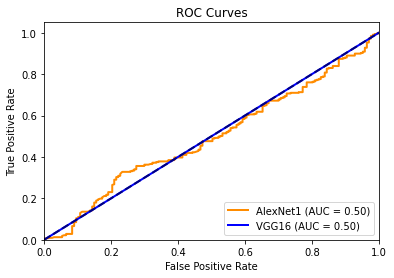

In [ ]:
plt.figure(5)
lw = 2
plt.plot(fpr_fc_4, tpr_fc_4, color='darkorange',
         lw=lw, label='AlexNet1 (AUC = %0.2f)' % roc_auc_4)
plt.plot(fpr_fc_5, tpr_fc_5, color='blue',
         lw=lw, label='VGG16 (AUC = %0.2f)' % roc_auc_5)

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend(loc="lower right")
plt.show()

As we can see, both Alexnet and VGG16 present the same ROC AUC value.

***Prediction On New Data***

We use the best model, in this case CNN3 model, for predicting on new data.

In [ ]:
from google.colab import files 
from keras.preprocessing import image
import numpy as np
uploaded = files.upload()
for filename in uploaded.keys():
  img_path ='/content/'+filename
  img = image.load_img(img_path, target_size =(150,150))
  images = image.img_to_array(img)
  images = np.expand_dims(images, axis=0)
  prediction = model_2.predict(images)
  print(filename)

  if prediction == 0:
    print('Covid diagnosis')
  else:
    print('Health status diagnosis')